In [1]:
# import some libraries
import numpy as np                 # module for numerical computing.
import matplotlib.pyplot as plt    # module for plotting.

# run some 'magic' commands
%matplotlib inline                         # allows plots to be displayed
                                           # in this html browser/notebook.
%run D:/repos/epm-tracker/epm/analysis.py  # run the analysis script in the epm folder

In [2]:
# load in you data

# the TrackingData class is found in analysis.py, and
# provides a convienent wrapper for looking at your 
# tracking data
tracking_data = TrackingData('test2-tracking-data-04.xlsx')

# the EPMArena class is also found in analysis.py and
# provides a convienent wrapper for storing information
# about the arena mask you created in the GUI
arena = EPMArena('test2_mask-pixel-coords.xlsx')  # note that you pass the 
                                                  # the pixel mask file with
                                                  # "-pixel-coords" appended to 
                                                  # the end of its name.

In [4]:
# Take a look at whats contained in your tracking_data
tracking_data.rr

array([ 109.23765432,  109.23765432,  106.5821727 , ...,  102.76878613,
        103.10471204,  103.59162304])

In [5]:
tracking_data.cc

array([ 164.64814815,  164.64814815,  163.98607242, ...,  197.60115607,
        196.95287958,  195.2408377 ])

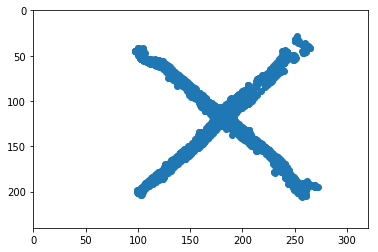

In [6]:
# above, are simply the coordinates of the mouse in the EPM during the 
# tracking trial.

# you can plot these as follows:
fig, ax = plt.subplots()                          # create a figure and axes handle to plot on
ax.scatter(tracking_data.cc, tracking_data.rr)    # create a scatter plot of the tracking coords
ax.set_xlim(0, 320)                               # set the x-limit to match the shape of the video frame
ax.set_ylim(0, 240)                               # set the y-limit to match the shape of the video frame
ax.invert_yaxis()                                 # invert the y-axis, so that the track matches what you observe in the video.

In [7]:
# you can get the total distance the mouse has traveled as follows:
total_distance = get_total_distance_traveled(tracking_data)
print total_distance

8205.98047963


In [9]:
# the above means that the mouse traveled a total of 8205.98 pixels over
# the course of the recording.

# you can also get the total distance that the mouse traveled from one
# frame to the next, for all frames, by calling:
distance_per_frame = get_per_frame_distance_traveled(tracking_data)
distance_per_frame

array([ 0.        ,  2.73677308,  2.34684814, ...,  0.81376387,
        0.73014288,  1.77993532])

<hr>

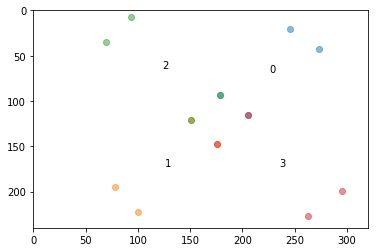

In [19]:
# Now, we can get data specific to the EPM by using the tracking_data
# and arena variables together.

# first, use the arena variable to plot the arena, and determine arm 
# labels
fig, ax = plt.subplots()
ax = arena.plot_arms(ax)

In [12]:
# Now that we know how the arena is oriented, we can specify which arms are 
# open, and which arms are closed, as follows:
arena.set_open_arms(0, 1)
arena.set_closed_arms(2, 3)

In [14]:
# And then we can call EMP-specific analysis functions.

# First, determine the fraction of time that the mouse spent in the
# open arms:
time_in_open = get_time_in_open_arms(tracking_data, arena)
print time_in_open

0.328895678743


In [15]:
# Then, determine the fraction of time the mouse spent in the
# closed arms:
time_in_closed = get_time_in_closed_arms(tracking_data, arena)
print time_in_closed

0.487123526844


In [17]:
# finally, determine the fraction of time the mouse spent in the
# center of the EPM:
time_in_center = get_time_in_center(tracking_data, arena)
print time_in_center

0.183980794413


In [18]:
# Note that these should add up to 1.
print time_in_open + time_in_closed + time_in_center

1.0


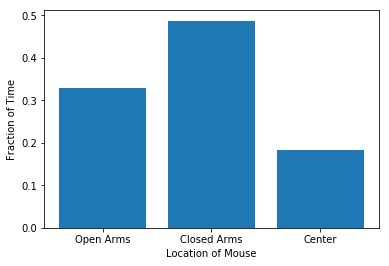

In [26]:
# you can also plot these here if you want.
fig, ax = plt.subplots()
ax.bar(left=[0, 1, 2], height=[time_in_open, time_in_closed, time_in_center])
ax.set_ylabel('Fraction of Time')
ax.set_xlabel('Location of Mouse')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Open Arms', 'Closed Arms', 'Center'])